MLflow Tracking URI: http://localhost:5000
Experiment ID: 797908409472402524
Pierwsze 5 wierszy danych:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma Kidney

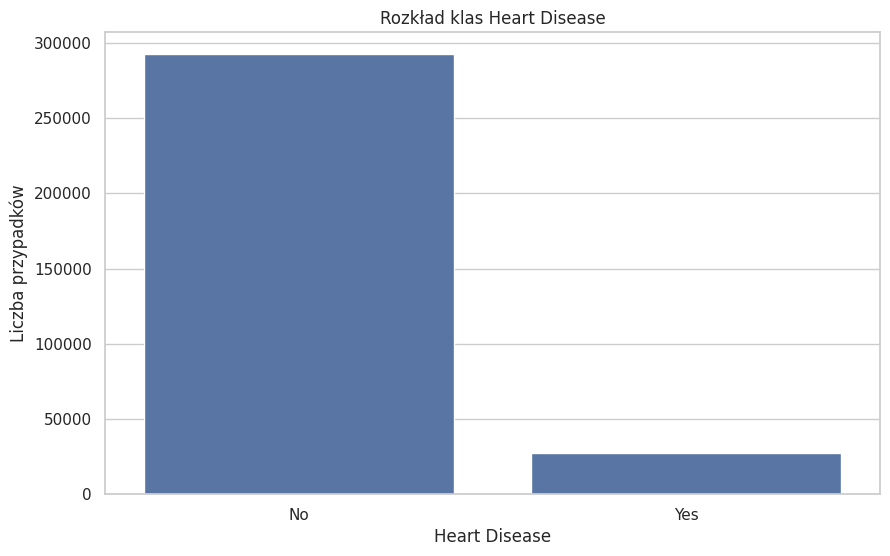

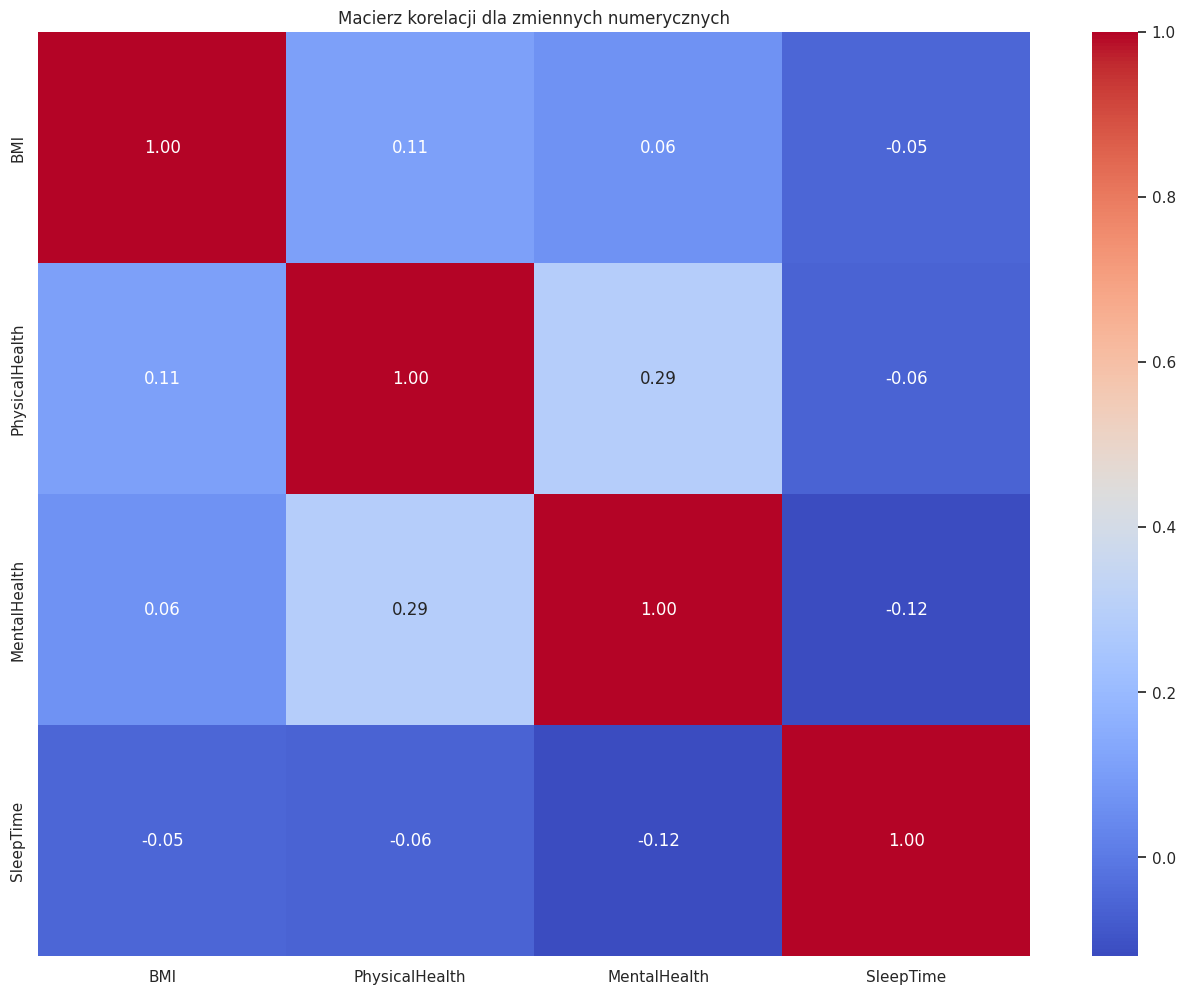

Kolumny kategoryczne: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Kolumny numeryczne: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Wymiary zbioru treningowego: (255836, 17)
Wymiary zbioru testowego: (63959, 17)


Trenowanie modeli:   0%|          | 0/4 [00:00<?, ?it/s]


Trenowanie modelu: LinearSVC


Trenowanie modeli:  25%|██▌       | 1/4 [00:07<00:23,  7.77s/it]

🏃 View run LinearSVC at: http://localhost:5000/#/experiments/797908409472402524/runs/91361bcac737406689cd17939240936c
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524
Model: LinearSVC, Accuracy: 0.9161, F1 Score: 0.8814

Trenowanie modelu: KNN


Trenowanie modeli:  50%|█████     | 2/4 [01:14<01:25, 42.56s/it]

🏃 View run KNN at: http://localhost:5000/#/experiments/797908409472402524/runs/35eb384db5e64ac297e8411a66ea224a
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524
Model: KNN, Accuracy: 0.9063, F1 Score: 0.8841

Trenowanie modelu: LogisticRegression


Trenowanie modeli:  75%|███████▌  | 3/4 [01:25<00:28, 28.21s/it]

🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/797908409472402524/runs/efe0856a5e184b7d873733cb63a6edc2
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524
Model: LogisticRegression, Accuracy: 0.9165, F1 Score: 0.8896

Trenowanie modelu: RandomForestClassifier


Trenowanie modeli: 100%|██████████| 4/4 [02:20<00:00, 35.21s/it]

🏃 View run RandomForestClassifier at: http://localhost:5000/#/experiments/797908409472402524/runs/c2d4aed77fef47a88e6ab14351c0b4f1
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524
Model: RandomForestClassifier, Accuracy: 0.9021, F1 Score: 0.8824

Podsumowanie wyników wszystkich modeli:
                        accuracy  precision    recall  f1_score   roc_auc
LinearSVC               0.916134   0.894517  0.916134  0.881381  0.834881
KNN                     0.906315   0.873841  0.906315  0.884107  0.702226
LogisticRegression      0.916509   0.891726  0.916509  0.889627  0.836640
RandomForestClassifier  0.902140   0.871022  0.902140  0.882367  0.780113
🏃 View run Model_Comparison_Summary at: http://localhost:5000/#/experiments/797908409472402524/runs/4f6d78a7691345b1ab6455a23b0bc621
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524


<Figure size 1200x800 with 0 Axes>

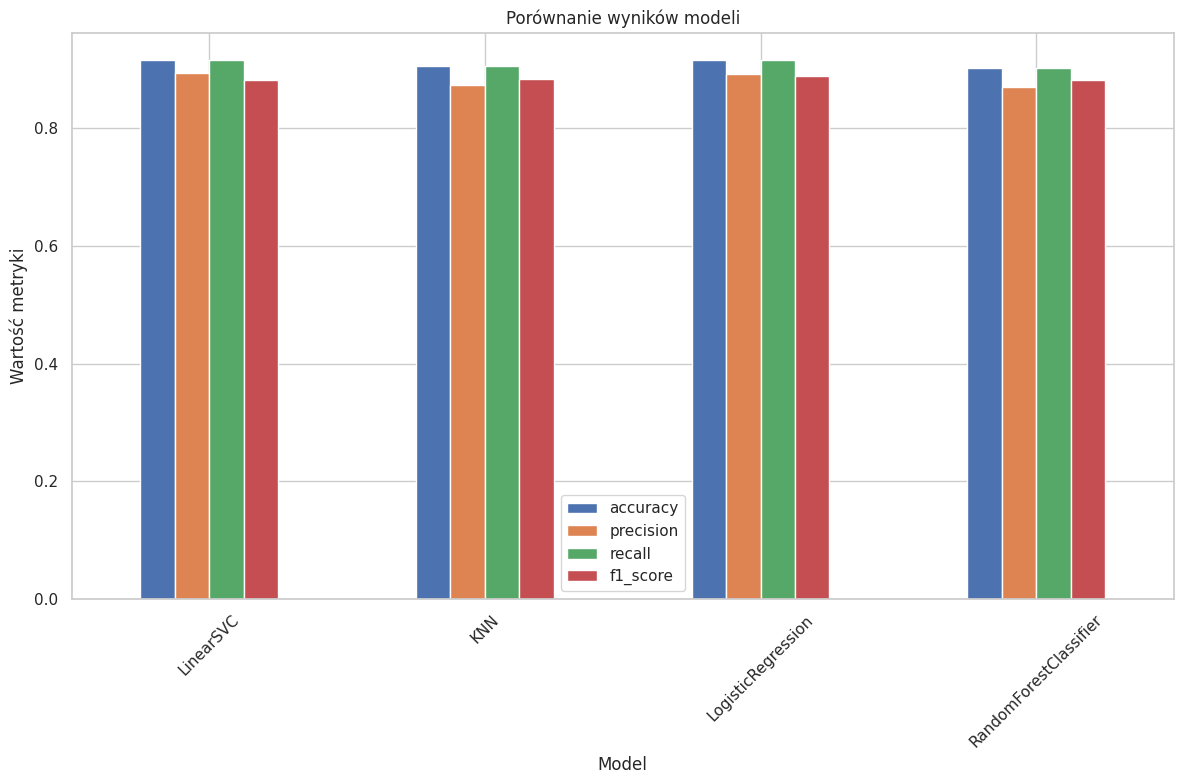


Najlepszy model: LogisticRegression z accuracy: 0.9165

Rozpoczęcie tuningu hiperparametrów dla najlepszego modelu...
Fitting 2 folds for each of 30 candidates, totalling 60 fits

Najlepsze parametry: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Najlepszy wynik cross-validation: 0.9159
Accuracy na zbiorze testowym: 0.9165
F1 Score na zbiorze testowym: 0.8895
🏃 View run LogisticRegression_hyperparameter_tuning at: http://localhost:5000/#/experiments/797908409472402524/runs/abcfd9670a6248efb7327b64cb5cc74a
🧪 View experiment at: http://localhost:5000/#/experiments/797908409472402524

Najlepszy model zapisany do: LogisticRegression_best_model.pkl

Demonstracja działania predict pipeline:
   prediction  probability
0           0     0.109921
1           0     0.096907
2           0     0.014162
3           0     0.275970
4           0     0.021111

Podsumowanie projektu:
1. Najlepszy model: LogisticRegression
2. Najlepsze parametry: {'classifier__C': 0

In [2]:
# Heart Disease Classification with MLflow

## 1. Instalacja i import niezbędnych bibliotek

# !pip install pandas numpy scikit-learn matplotlib seaborn mlflow kaggle opendatasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, confusion_matrix, classification_report
)
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from mlflow.models.signature import infer_signature

# Ustawienie stylu dla wykresów
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Konfiguracja MLflow
mlflow.set_tracking_uri("http://localhost:5000")  # Zmień na adres swojego serwera MLflow
experiment_name = "Heart_Disease_Classification"
mlflow.set_experiment(experiment_name)

print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {mlflow.get_experiment_by_name(experiment_name).experiment_id}")

## 2. Pobieranie danych 

data_path = "../data/heart_2020_cleaned.csv"  
data = pd.read_csv(data_path)

## 3. Eksploracja danych

print("Pierwsze 5 wierszy danych:")
print(data.head())

print("\nInformacje o danych:")
print(data.info())

print("\nStatystyki opisowe:")
print(data.describe())

print("\nLiczba brakujących wartości w każdej kolumnie:")
print(data.isnull().sum())

print("\nRozkład klas docelowych:")
print(data['HeartDisease'].value_counts())
print(data['HeartDisease'].value_counts(normalize=True) * 100)

# Wizualizacja rozkładu klas
plt.figure(figsize=(10, 6))
sns.countplot(x='HeartDisease', data=data)
plt.title('Rozkład klas Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Liczba przypadków')
plt.show()

# Analiza korelacji
plt.figure(figsize=(16, 12))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji dla zmiennych numerycznych')
plt.show()

## 4. Przygotowanie danych

# Podział na cechy i zmienną docelową
X = data.drop('HeartDisease', axis=1)
#y = data['HeartDisease']
y = data['HeartDisease'].map({'No': 0, 'Yes': 1})

# Identyfikacja kolumn kategorycznych i numerycznych
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolumny kategoryczne:", categorical_cols)
print("Kolumny numeryczne:", numerical_cols)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Wymiary zbioru treningowego: {X_train.shape}")
print(f"Wymiary zbioru testowego: {X_test.shape}")

## 5. Rozwój Train Pipeline

# Definiowanie preprocessingu dla kolumn numerycznych i kategorycznych
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Połączenie transformerów w jeden preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Funkcja do tworzenia pipeline'u modelu
def create_model_pipeline(classifier):
    """Tworzy pipeline dla modelu, który zawiera preprocessor i klasyfikator."""
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

## 6. Eksperymentowanie z różnymi klasyfikatorami

# Lista klasyfikatorów do przetestowania
classifiers = {
    "LinearSVC": LinearSVC(random_state=42, max_iter=10000),
    "KNN": KNeighborsClassifier(),
    #"SVC": SVC(random_state=42, probability=True),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Słownik do przechowywania wyników
results = {}

# Funkcja do zapisywania modelu i metryk w MLflow
def log_model_to_mlflow(model, model_name, pipeline, X_test, y_test):
    """Loguje model i metryki do MLflow."""
    y_pred = pipeline.predict(X_test)
    
    if hasattr(pipeline, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(pipeline, "decision_function"):
        y_prob = pipeline.decision_function(X_test)
        #y_prob = pipeline.named_steps['classifier'].decision_function(X_test)
        #y_prob = pipeline.decision_function(X_test)
        if hasattr(pipeline, "predict_proba"):
            y_prob = pipeline.predict_proba(X_test)[:, 1]
        elif hasattr(pipeline, "decision_function"):
            y_prob = pipeline.decision_function(X_test)
        else:
            y_prob = None
    else:
        y_prob = None
    
    # Obliczanie metryk
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Rozpoczęcie run w MLflow
    with mlflow.start_run(run_name=model_name):
        # Logowanie parametrów modelu
        params = model.get_params()
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
            
        # Logowanie metryk
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Generowanie i logowanie confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        confusion_matrix_path = f"confusion_matrix_{model_name}.png"
        plt.savefig(confusion_matrix_path)
        plt.close()
        mlflow.log_artifact(confusion_matrix_path)
        
        # Generowanie i logowanie ROC curve (jeśli model obsługuje predict_proba)
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            
            plt.figure(figsize=(10, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name}')
            plt.legend(loc="lower right")
            roc_curve_path = f"roc_curve_{model_name}.png"
            plt.savefig(roc_curve_path)
            plt.close()
            mlflow.log_artifact(roc_curve_path)
            mlflow.log_metric("roc_auc", roc_auc)
        
        # Logowanie modelu w MLflow
        #mlflow.sklearn.log_model(pipeline, f"{model_name}_model")
        signature = infer_signature(X_test, y_pred)
        mlflow.sklearn.log_model(
            pipeline,
            f"{model_name}_model",
            input_example=X_test.iloc[:1],
            signature=signature
        )
        
        # Logowanie classification report
        clf_report = classification_report(y_test, y_pred, output_dict=True)
        clf_report_df = pd.DataFrame(clf_report).transpose()
        clf_report_path = f"classification_report_{model_name}.csv"
        clf_report_df.to_csv(clf_report_path)
        mlflow.log_artifact(clf_report_path)
        
        # Zwróć metryki do dalszego użycia
        return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "roc_auc": roc_auc if y_prob is not None else None
        }

# Trenowanie i ewaluacja modeli
#for name, classifier in classifiers.items():
for name, classifier in tqdm(classifiers.items(), desc="Trenowanie modeli", total=len(classifiers)):
    print(f"\nTrenowanie modelu: {name}")
    
    # Tworzenie pipeline dla modelu
    pipeline = create_model_pipeline(classifier)
    
    # Trenowanie modelu
    pipeline.fit(X_train, y_train)
    
    # Logowanie modelu i metryk do MLflow
    result = log_model_to_mlflow(classifier, name, pipeline, X_test, y_test)
    results[name] = result
    
    print(f"Model: {name}, Accuracy: {result['accuracy']:.4f}, F1 Score: {result['f1_score']:.4f}")

# Porównanie wyników modeli
results_df = pd.DataFrame(results).T
print("\nPodsumowanie wyników wszystkich modeli:")
print(results_df)

# Zapis wyników do pliku CSV i logowanie jako artefakt do MLflow
results_csv_path = "model_results_summary.csv"
results_df.to_csv(results_csv_path)
with mlflow.start_run(run_name="Model_Comparison_Summary"):
    mlflow.log_artifact(results_csv_path)

# Wizualizacja porównania modeli
plt.figure(figsize=(12, 8))
results_df[['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar')
plt.title('Porównanie wyników modeli')
plt.xlabel('Model')
plt.ylabel('Wartość metryki')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()

## 7. Tuning hiperparametrów dla najlepszego modelu

# Wybór najlepszego modelu na podstawie accuracy
best_model_name = results_df['accuracy'].idxmax()
print(f"\nNajlepszy model: {best_model_name} z accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}")

# Definiowanie parametrów do tuningu w zależności od najlepszego modelu
if best_model_name == "LinearSVC":
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
        'classifier__dual': [True, False]
    }
elif best_model_name == "KNN":
    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
elif best_model_name == "SVC":
    param_grid = {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto', 0.1, 0.01]
    }
elif best_model_name == "LogisticRegression":
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        #'classifier__penalty': ['l2', None]
        'classifier__penalty': ['l2']
    }
elif best_model_name == "RandomForestClassifier":
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }

# Tworzenie pipeline dla najlepszego modelu
best_classifier = classifiers[best_model_name]
best_pipeline = create_model_pipeline(best_classifier)

# Tuning hiperparametrów z wykorzystaniem GridSearchCV i MLflow
print("\nRozpoczęcie tuningu hiperparametrów dla najlepszego modelu...")

with mlflow.start_run(run_name=f"{best_model_name}_hyperparameter_tuning"):
    # Logowanie podstawowych informacji
    mlflow.log_param("model_type", best_model_name)
    mlflow.log_param("cv_folds", 5)
    
    # Utworzenie GridSearchCV
    grid_search = GridSearchCV(
        best_pipeline,
        param_grid,
        cv=2, #cv=5
        scoring='accuracy',
        verbose=1,
        n_jobs=1  
    )
    
    # Trenowanie GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Logowanie wyników
    mlflow.log_param("best_params", grid_search.best_params_)
    mlflow.log_metric("best_cv_score", grid_search.best_score_)
    
    # Ocena modelu na zbiorze testowym
    y_pred = grid_search.predict(X_test)
    
    # Obliczanie i logowanie metryk
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_f1", test_f1)
    
    # Generowanie i logowanie confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model_name} (tuned)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    confusion_matrix_path = f"confusion_matrix_{best_model_name}_tuned.png"
    plt.savefig(confusion_matrix_path)
    plt.close()
    mlflow.log_artifact(confusion_matrix_path)
    
    # Generowanie i logowanie ROC curve (jeśli model obsługuje predict_proba)
    if hasattr(grid_search, "predict_proba"):
        y_prob = grid_search.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {best_model_name} (tuned)')
        plt.legend(loc="lower right")
        roc_curve_path = f"roc_curve_{best_model_name}_tuned.png"
        plt.savefig(roc_curve_path)
        plt.close()
        mlflow.log_artifact(roc_curve_path)
        mlflow.log_metric("roc_auc", roc_auc)
    
    # Logowanie najlepszego modelu w MLflow
    #mlflow.sklearn.log_model(grid_search.best_estimator_, f"{best_model_name}_tuned_model")
    input_example = X_test.iloc[:1]
    signature = infer_signature(X_test, y_pred)

    mlflow.sklearn.log_model(
        grid_search.best_estimator_,
        f"{best_model_name}_tuned_model",
        input_example=input_example,
        signature=signature
    )
    
    # Logowanie classification report
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).transpose()
    clf_report_path = f"classification_report_{best_model_name}_tuned.csv"
    clf_report_df.to_csv(clf_report_path)
    mlflow.log_artifact(clf_report_path)
    
    print(f"\nNajlepsze parametry: {grid_search.best_params_}")
    print(f"Najlepszy wynik cross-validation: {grid_search.best_score_:.4f}")
    print(f"Accuracy na zbiorze testowym: {test_accuracy:.4f}")
    print(f"F1 Score na zbiorze testowym: {test_f1:.4f}")

## 8. Commit i Trigger Predict

# Zapisanie najlepszego modelu do pliku
import joblib
model_path = f"{best_model_name}_best_model.pkl"
joblib.dump(grid_search.best_estimator_, model_path)
print(f"\nNajlepszy model zapisany do: {model_path}")

## 9. Predict Pipeline

# Funkcja do przetwarzania nowych danych i generowania predykcji
def predict_pipeline(data_to_predict, model_path):
    """
    Przetwarzanie nowych danych i generowanie predykcji.
    
    Args:
        data_to_predict: DataFrame z nowymi danymi do predykcji
        model_path: Ścieżka do zapisanego modelu
    
    Returns:
        DataFrame z predykcjami
    """
    # Wczytanie modelu
    loaded_model = joblib.load(model_path)
    
    # Generowanie predykcji
    predictions = loaded_model.predict(data_to_predict)
    
    # Jeśli model obsługuje predict_proba, generowanie prawdopodobieństw
    if hasattr(loaded_model, "predict_proba"):
        probabilities = loaded_model.predict_proba(data_to_predict)[:, 1]
        result_df = pd.DataFrame({
            'prediction': predictions,
            'probability': probabilities
        })
    else:
        result_df = pd.DataFrame({
            'prediction': predictions
        })
    
    return result_df

# Demonstracja działania predict pipeline na małym przykładzie
print("\nDemonstracja działania predict pipeline:")
sample_data = X_test.iloc[:5]  # Użycie 5 pierwszych wierszy z X_test jako przykład
predictions = predict_pipeline(sample_data, model_path)
print(predictions)

## 10. Podsumowanie

print("\nPodsumowanie projektu:")
print(f"1. Najlepszy model: {best_model_name}")
print(f"2. Najlepsze parametry: {grid_search.best_params_}")
print(f"3. Accuracy najlepszego modelu: {test_accuracy:.4f}")
print(f"4. F1 Score najlepszego modelu: {test_f1:.4f}")
print(f"5. Precision najlepszego modelu: {test_precision:.4f}")
print(f"6. Recall najlepszego modelu: {test_recall:.4f}")

print("\nWszystkie eksperymenty i wyniki są dostępne w MLflow pod adresem:")
print(f"MLflow UI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {mlflow.get_experiment_by_name(experiment_name).experiment_id}")

# Czyszczenie tymczasowych plików
for file in [confusion_matrix_path, roc_curve_path, clf_report_path]:
    if os.path.exists(file):
        os.remove(file)

print("\nProjekt zakończony sukcesem!")